In [3]:
pip install tensorflow_datasets

     |████████████████████████████████| 4.7 MB 7.9 MB/s eta 0:00:01
     |████████████████████████████████| 140 kB 93.8 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 3.0 MB/s  eta 0:00:01
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21494 sha256=bfdf7045f239aca141f3d9437c7d7f9a1e35a31bf9c2b3be74daba20e043aa53
  Stored in directory: /home/azureuser/.cache/pip/wheels/54/aa/01/724885182f93150035a2a91bce34a12877e8067a97baaf5dc8
Successfully built promise
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [5]:
imdb, info = tfds.load("imdb_reviews",with_info=True, as_supervised=True)

2022-11-08 06:25:57.860348: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /home/azureuser/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete7XXKBI/imdb_reviews-trai…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /home/azureuser/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete7XXKBI/imdb_reviews-test…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /home/azureuser/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete7XXKBI/imdb_reviews-unsu…

Dataset imdb_reviews downloaded and prepared to /home/azureuser/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


2022-11-08 06:26:45.752342: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-08 06:26:45.752410: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (madhav-trest): /proc/driver/nvidia/version does not exist
2022-11-08 06:26:45.753463: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
train_data, test_data = imdb['train'], imdb['test']

In [12]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())
    
for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

In [13]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [14]:
vocab_size = 10000
embedding_dim=16
max_length = 120
trunc_type= 'post'
oov_tok=""

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [18]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1568      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161,909
Trainable params: 161,909
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
num_epochs=30
history=model.fit(padded, training_labels_final, epochs=num_epochs, validation_data = (testing_padded, testing_labels_final))

Epoch 1/30
782/782 [==============================] - 19s 23ms/step - loss: 0.6925 - accuracy: 0.5144 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 2/30
782/782 [==============================] - 18s 23ms/step - loss: 0.6244 - accuracy: 0.6524 - val_loss: 0.5799 - val_accuracy: 0.7027
Epoch 3/30
782/782 [==============================] - 18s 23ms/step - loss: 0.4296 - accuracy: 0.8118 - val_loss: 0.4515 - val_accuracy: 0.8065
Epoch 4/30
782/782 [==============================] - 18s 23ms/step - loss: 0.2668 - accuracy: 0.8924 - val_loss: 0.5541 - val_accuracy: 0.7946
Epoch 5/30
782/782 [==============================] - 18s 23ms/step - loss: 0.1444 - accuracy: 0.9467 - val_loss: 0.7399 - val_accuracy: 0.7482
Epoch 6/30
782/782 [==============================] - 18s 23ms/step - loss: 0.0820 - accuracy: 0.9708 - val_loss: 0.9694 - val_accuracy: 0.7277
Epoch 7/30
782/782 [==============================] - 18s 23ms/step - loss: 0.0880 - accuracy: 0.9670 - val_loss: 0.9927 - val_accuracy:

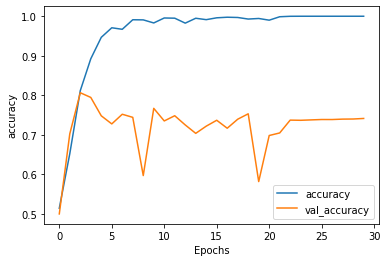

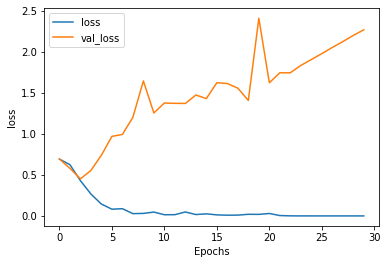

In [23]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')    
plot_graphs(history, 'loss')

In [24]:
#Gated Recurrent Unit (GRU)
#This is an improved version of the RNN model. It is more efficient than SimpleRNN models. 
#It has two gates: reset and update. For this demonstration, I will replace the SimpleRNN layer with a bidirectional GRU layer with the same number of units.


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               9600      
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 170,261
Trainable params: 170,261
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss="binary_crossentropy",
             optimizer='adam',metrics=['accuracy'])
history=model.fit(padded, training_labels_final, epochs=num_epochs,
            validation_data = (testing_padded,testing_labels_final))

Epoch 1/30
782/782 [==============================] - 36s 41ms/step - loss: 0.5078 - accuracy: 0.7216 - val_loss: 0.3504 - val_accuracy: 0.8495
Epoch 2/30
782/782 [==============================] - 32s 41ms/step - loss: 0.2940 - accuracy: 0.8789 - val_loss: 0.3571 - val_accuracy: 0.8459
Epoch 3/30
782/782 [==============================] - 32s 41ms/step - loss: 0.2304 - accuracy: 0.9106 - val_loss: 0.3899 - val_accuracy: 0.8429
Epoch 4/30
782/782 [==============================] - 32s 41ms/step - loss: 0.1754 - accuracy: 0.9358 - val_loss: 0.4204 - val_accuracy: 0.8373
Epoch 5/30
782/782 [==============================] - 32s 41ms/step - loss: 0.1181 - accuracy: 0.9598 - val_loss: 0.4949 - val_accuracy: 0.8273
Epoch 6/30
782/782 [==============================] - 32s 41ms/step - loss: 0.0763 - accuracy: 0.9747 - val_loss: 0.5838 - val_accuracy: 0.8240
Epoch 7/30
782/782 [==============================] - 32s 41ms/step - loss: 0.0480 - accuracy: 0.9853 - val_loss: 0.7359 - val_accuracy:

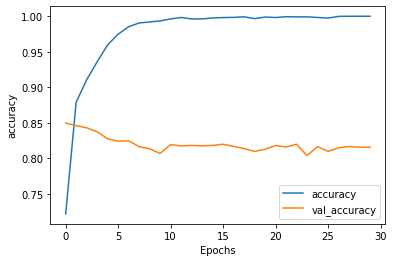

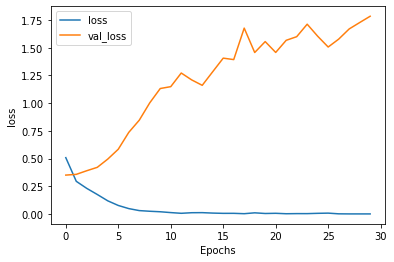

In [26]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [27]:
#Long Short Term Model (LSTM)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 173,205
Trainable params: 173,205
Non-trainable params: 0
_________________________________________________________________


In [28]:
num_epochs=30
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data = (testing_padded, testing_labels_final))

Epoch 1/30
782/782 [==============================] - 36s 42ms/step - loss: 0.5249 - accuracy: 0.7334 - val_loss: 0.3745 - val_accuracy: 0.8384
Epoch 2/30
782/782 [==============================] - 33s 42ms/step - loss: 0.3292 - accuracy: 0.8635 - val_loss: 0.3575 - val_accuracy: 0.8472
Epoch 3/30
782/782 [==============================] - 33s 42ms/step - loss: 0.2560 - accuracy: 0.8988 - val_loss: 0.3844 - val_accuracy: 0.8454
Epoch 4/30
782/782 [==============================] - 33s 43ms/step - loss: 0.2083 - accuracy: 0.9225 - val_loss: 0.4185 - val_accuracy: 0.8404
Epoch 5/30
782/782 [==============================] - 33s 43ms/step - loss: 0.1613 - accuracy: 0.9414 - val_loss: 0.5193 - val_accuracy: 0.8279
Epoch 6/30
782/782 [==============================] - 33s 42ms/step - loss: 0.1257 - accuracy: 0.9553 - val_loss: 0.4865 - val_accuracy: 0.8255
Epoch 7/30
782/782 [==============================] - 33s 42ms/step - loss: 0.1006 - accuracy: 0.9658 - val_loss: 0.5879 - val_accuracy:

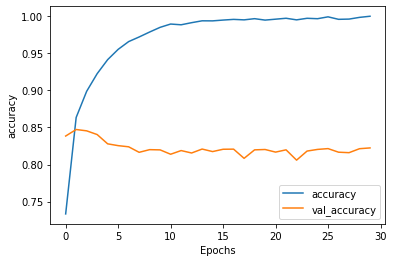

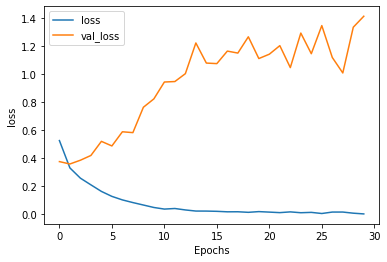

In [29]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')